# Code

In [1]:
import pandas as pd
import os
import numpy as np
import sys
from sklearn.model_selection import train_test_split

sys.path.insert(0, '..')
import dataset.train_test_val_utils as utils
from config import *

In [2]:
df_pairs_full = pd.read_csv(os.path.join(processed_files_dir, 'df_pairs_full.csv')).sample(frac=1).drop_duplicates().reset_index(drop = True)
df_genes = pd.read_csv(os.path.join(processed_files_dir, 'df_genes.csv'))

In [3]:
df = pd.read_csv(os.path.join(processed_files_dir, 'final_df.csv'))

### Stupid train test split 

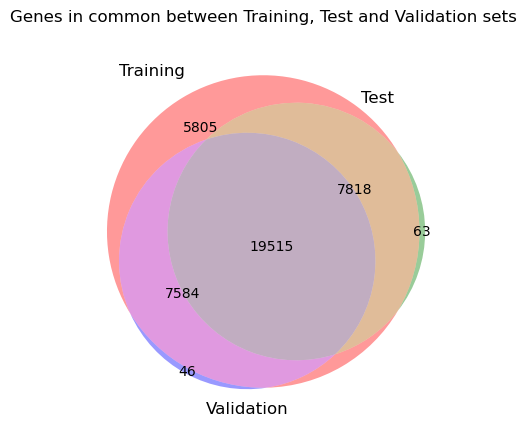

In [4]:
train_val, test = train_test_split(df_pairs_full, test_size=0.15)
train, val = train_test_split(train_val, test_size=0.18)

gene_pairs_training = list(set(train.positive).union(train.negative))
gene_pairs_test = list(set(val.positive).union(val.negative))
gene_pairs_val = list(set(test.positive).union(test.negative))
utils.venn_between_genes(gene_pairs_training, gene_pairs_test, gene_pairs_val)

# Proper train test split 

In [5]:
df_pairs_full['gene1'] = df_pairs_full.positive.str.split('_', expand = True)[0]
df_pairs_full['gene2'] = df_pairs_full.positive.str.split('_', expand = True)[1]

df_pairs_full['gene1_neg'] = df_pairs_full.negative.str.split('_', expand = True)[0]
df_pairs_full['gene2_neg'] = df_pairs_full.negative.str.split('_', expand = True)[1]

In [6]:
assert set(df_pairs_full.gene1).union(set(df_pairs_full.gene2)) == set(df_genes.gene_id)
assert set(df_pairs_full.gene1_neg).union(set(df_pairs_full.gene2_neg)) == set(df_genes.gene_id).union({np.nan})

In [12]:
#circa 5 min
gene_pairs_training, gene_pairs_test, gene_pairs_val = utils.create_or_load_train_test_val(df_pairs_full, save_path = rna_rna_files_dir)

progress around 3.49%
progress around 5.44%
progress around 6.67%
progress around 8.4%
progress around 9.5%
progress around 9.5%
progress around 10.24%
progress around 10.31%
progress around 10.87%
progress around 11.55%
progress around 14.18%
progress around 16.43%
progress around 0.25%
progress around 0.92%
progress around 5.14%
progress around 5.84%
progress around 8.86%
progress around 10.14%
progress around 11.11%
progress around 12.13%
progress around 13.14%
progress around 18.17%
progress around 18.85%
progress around 19.19%
progress around 19.69%
Total time: 5.376885374387105 minutes


In [8]:
all_possible_pairs = set(df_pairs_full.positive).union(set(df_pairs_full.negative))
assert set(gene_pairs_training).union(set(gene_pairs_val)).union(set(gene_pairs_test)) == all_possible_pairs

In [9]:
#one negative can be the same for 2 positives of the dataset. 
#If this happens, then I can have the same negative couple in the train, test, val sets.
#If this happens, then I take both the positive and the negative pair and I put them in the training set.

In [10]:
neg_problematics = list(df_pairs_full[(df_pairs_full.negative.duplicated())&(~df_pairs_full.negative.isna())].negative)
problematics = list(df_pairs_full[df_pairs_full.negative.isin(neg_problematics)][['positive', 'negative']].values.flatten())
problematics = set(problematics)
assert problematics - set(all_possible_pairs) == set()

In [11]:
gene_pairs_training = list(set(gene_pairs_training).union(problematics) - set({np.nan}))
gene_pairs_val = list(set(gene_pairs_val) - problematics.union(set({np.nan})))
gene_pairs_test = list(set(gene_pairs_test) - problematics.union(set({np.nan})))

In [12]:
assert set(gene_pairs_training).intersection(set(gene_pairs_val)) == set()
assert set(gene_pairs_training).intersection(set(gene_pairs_test)) == set()
assert set(gene_pairs_val).intersection(set(gene_pairs_test)) == set()

### Plots and stats

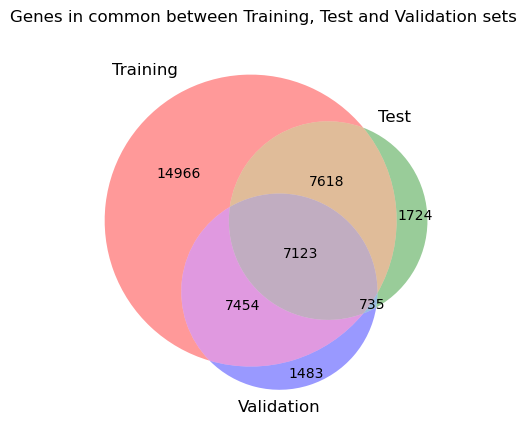

In [115]:
utils.venn_between_genes(gene_pairs_training, gene_pairs_test, gene_pairs_val)

In [116]:
#Percentage of train-test-validation
perc_train = np.round(len(gene_pairs_training)/len(all_possible_pairs), 2)
perc_test = np.round(len(gene_pairs_test)/len(all_possible_pairs), 2)
perc_val = np.round(len(gene_pairs_val)/len(all_possible_pairs), 2)
print(f'{perc_train=}')
print(f'{perc_test=}')
print(f'{perc_val=}')

perc_train=0.72
perc_test=0.14
perc_val=0.14


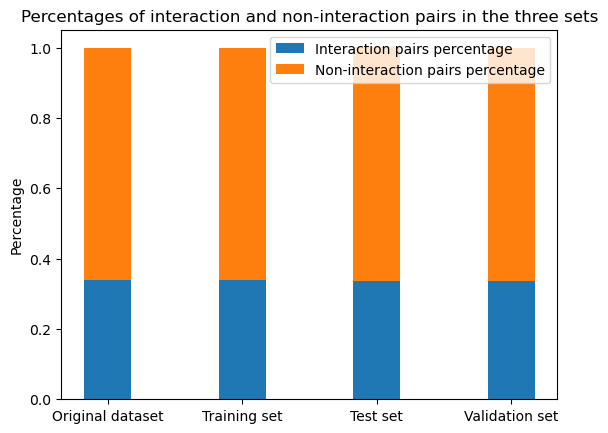

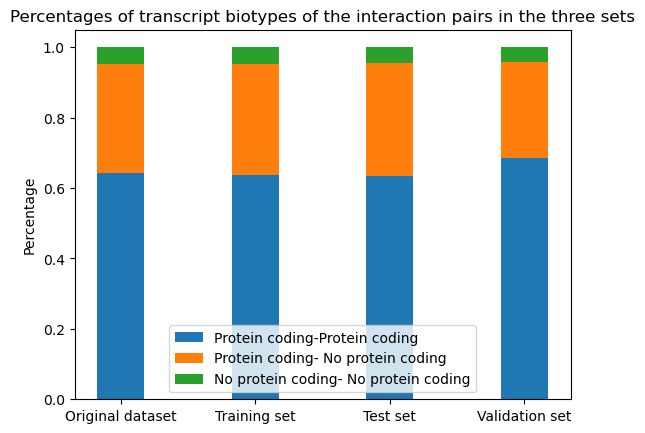

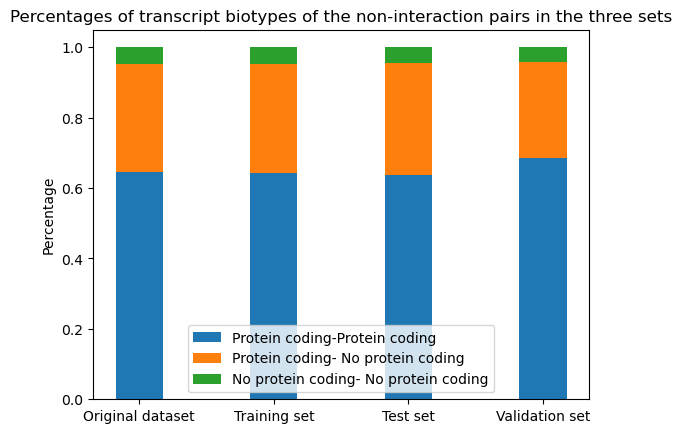

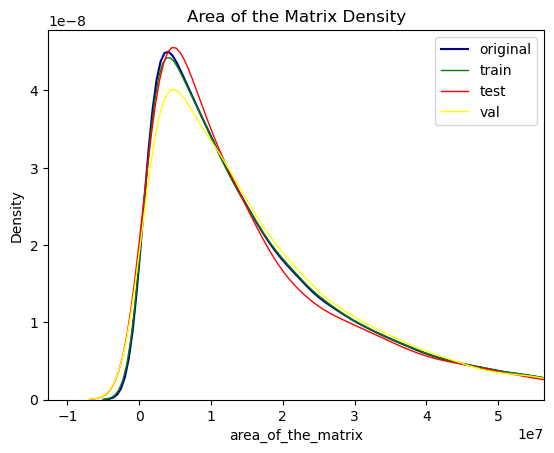

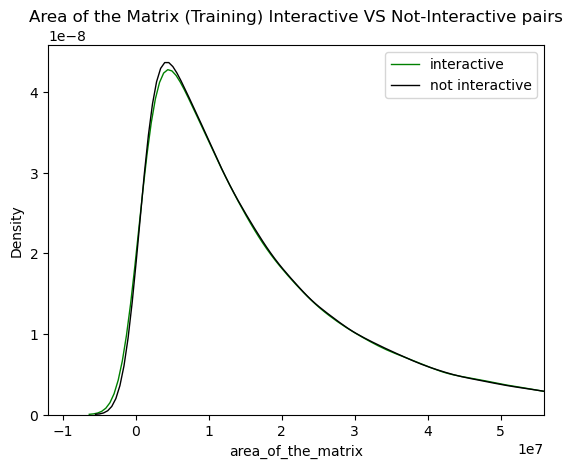

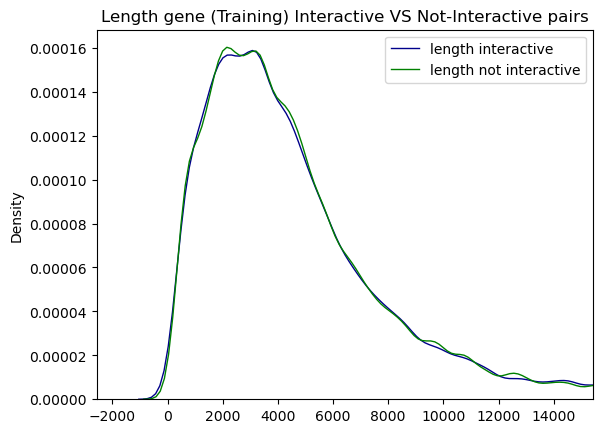

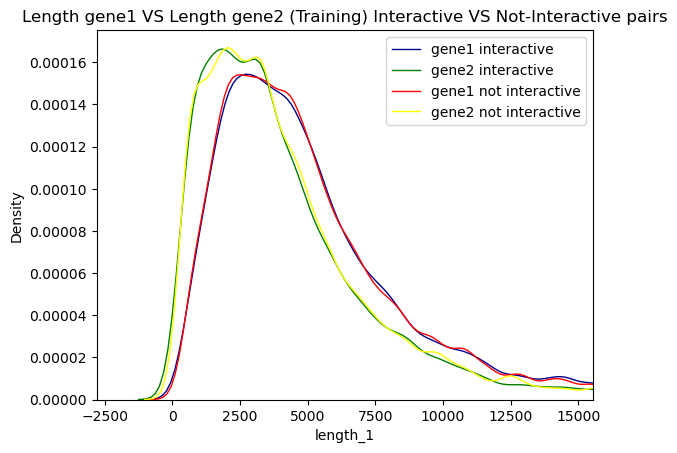

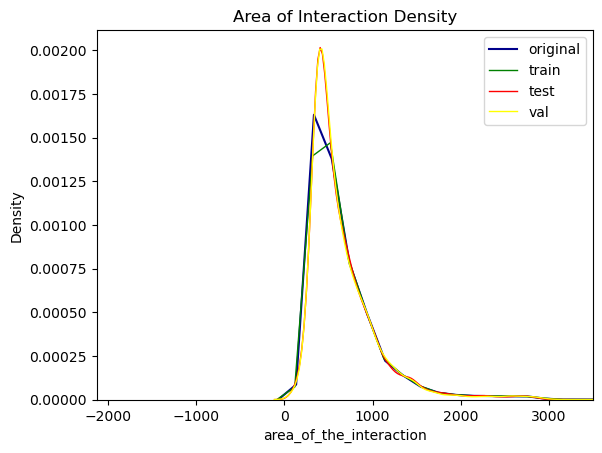

In [117]:
utils.plot_stats(df, gene_pairs_training, gene_pairs_test, gene_pairs_val, limit_plot = 100000000)